In [1]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *
import h5py
import corner.corner as corner

In [8]:
df1_data = {'App Mag': [13.208, 15.6, 14.976], 
            'Errors': [0.1, 0.1, 0.1], 
            'Filter': ['H1', "G2_BP", 'r']}
df1 = pd.DataFrame(df1_data)
df1

,App Mag,Errors,Filter
0,13.208,0.1,H1
1,15.600,0.1,G2_BP
2,14.976,0.1,r


In [68]:
hf = h5py.File("h5test.hdf5", 'w')

In [69]:
def _data_save_fmt(datatable):
    filts = datatable["Filter"]
    dt = datatable.drop(columns=["Filter"])
    return dt, filts
data, filts = _data_save_fmt(df1)
filts.to_numpy(dtype="S")

array([b'H', b'I', b'r'], dtype='|S1')

In [70]:
hf.create_dataset('data', data=data)
hf.create_dataset('filters', data=filts.to_numpy(dtype="S"), dtype=h5py.string_dtype(encoding='ascii'))
hf.attrs['plx'] = 100
hf.attrs['plx_err'] = 0.01
hf.attrs['keyword'] = "informative"
hf.close()

In [53]:
hf.close()

In [71]:
hfr = h5py.File("h5test.hdf5", 'r')  # Opens file for reading
data_table = pd.DataFrame(hfr.get('data'))
filts = np.array(hfr.get('filters'), dtype='S').astype("str")
data_table.columns = ["App Mag", "Errors"]
data_table["Filter"] = filts
plx = hfr.attrs["plx"]
plx_err = hfr.attrs["plx_err"]
keyword = hfr.attrs['keyword']
hfr.close()
keyword

'informative'

In [9]:
s = System(df1, 100, 0.01)
#s.init_age_prior
s.sys_priors

[UniformPrior(minval=0.2, maxval=1.3),
 UniformPrior(minval=0.0, maxval=15640000000.0),
 GaussianPrior(mu=100, sigma=0.01, no_negatives=True)]

In [4]:
mdf = maketable('WD', filters=["H", "J"])

In [5]:
findMags(mdf, 1.13487333e+00, 9.10543304e+09, 1.00003039e+02, filters=['H', 'J'])

Interpolation error: 1.13487333 M$\odot$, 9105433040.0 yrs
Interpolation error: 1.13487333 M$\odot$, 9105433040.0 yrs


array([9.75838722, 9.85291743])

In [12]:
sampler = MCMCSampler(s, num_threads=5, num_temps=3, num_walkers=200, table_type='WD', filters=['H1', "G2_BP", 'r'])

In [13]:
sampler.run_sampler(1000, 100, 2, "wdcomptest1.hdf5")

Starting Burn in
100/100 steps of burn-in complete
Burn in complete. Sampling posterior now.
1000/1000 steps completed
Run complete


[<Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 432x288 with 1 Axes>,
 <Figure size 547.2x547.2 with 9 Axes>]

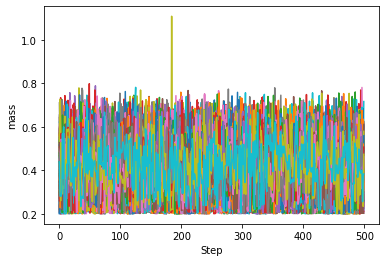

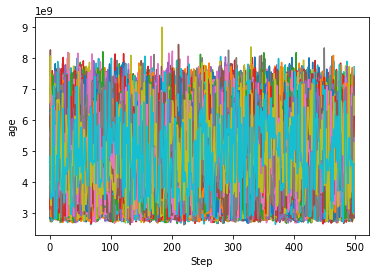

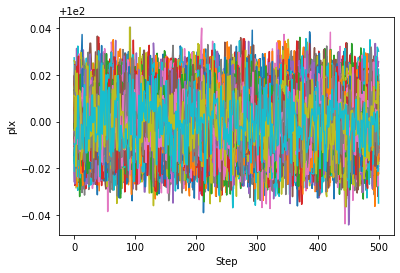

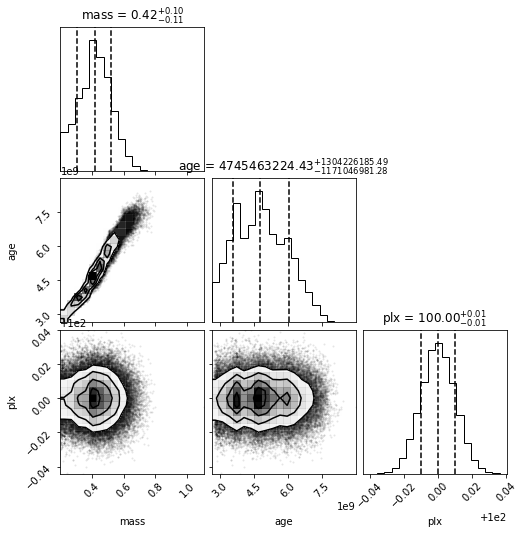

In [14]:
sampler.examine_chains()

In [15]:
df2_data = {'App Mag': [12.038, 11.167, 11.572], 
            'Errors': [0.1, 0.1, 0.1], 
            'Filter': ['H1', "G2_BP", 'r']}
df2 = pd.DataFrame(df2_data)
df2

,App Mag,Errors,Filter
0,12.038,0.1,H1
1,11.167,0.1,G2_BP
2,11.572,0.1,r


In [ ]:
s = System(df2, 100, 0.01)
sampler = MCMCSampler(s, num_threads=5, num_temps=3, num_walkers=200, table_type='WD', filters=['H1', "G2_BP", 'r'])
sampler.run_sampler(1000, 100, 2, "wdcomptest2.hdf5")

In [ ]:
sampler.examine_chains()